In [1360]:
!pip install xgboost

In [1425]:
!pip install mlens

In [1446]:
#Packages:
import pandas as pd
import numpy as np
import pyreadr as pyr
import sklearn as sk
import matplotlib.pyplot as plt
import scipy as sc
import os
import nltk
import spacy
from contexto.limpieza import *
from contexto.lectura import leer_texto
from contexto.exploracion import grafica_barchart_frecuencias
from contexto.exploracion import obtener_ngramas, par_nubes
from contexto.lematizacion import lematizar_texto
from contexto.correccion import corregir_texto
from contexto.lematizacion import LematizadorSpacy
from contexto.exploracion import obtener_ngramas
from contexto.exploracion import frecuencia_ngramas
from nltk.corpus import stopwords
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from scipy.stats import chi2
from sklearn.impute import KNNImputer
from sklearn.metrics import make_scorer
from numpy.random import normal
from numpy.random import seed
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from mlens.ensemble import SuperLearner
from sklearn.linear_model import LinearRegression

In [1279]:
#Set directory:
os.chdir("C:/Users/juand/Desktop/Big Data/Taller 3/dataPS3")
tr=pyr.read_r("train.Rds") 
tt=pyr.read_r("test.Rds")
print(tr.keys())
print(tt.keys())
df_tr=tr[None] #Train Data frame (Bogotá D.C. y Medellín). 
df_tt=tt[None] #Test Data frame (Cali). 

odict_keys([None])
odict_keys([None])


In [1280]:
df_tr.drop("rooms", axis=1, inplace=True) #Correct bedrooms data.
df_tt.drop("rooms", axis=1, inplace=True) #Correct bedrooms data.

In [1281]:
stopw=stopwords.words('spanish')
stopw.append("br")

In [1282]:
###Funcion para limpiar todos los textos
def limp_texto(text):
    #textocorr=lematizar_texto(str(text), lenguaje='es', libreria='spacy', limpiar=False)
    textolimpio=limpieza_texto(str(text), lista_palabras=stopw, quitar_numeros=False, quitar_acentos=True)
    return textolimpio
    

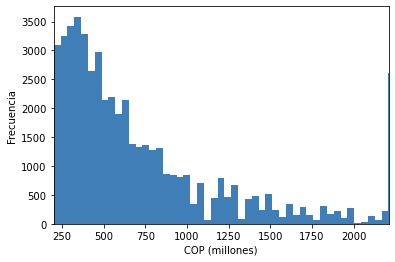

744197549.3413885

In [1283]:
y=sc.stats.mstats.winsorize(df_tr["price"], limits=[0,0.05], inplace=True)
y_millones=y/1000000
plt.hist(y_millones, bins=50, color = (0.17, 0.44, 0.69, 0.9))
plt.xlim(200,2210)
plt.ylabel("Frecuencia")
plt.xlabel("COP (millones)")
plt.savefig("histy_precios.jpg", bbox_inches="tight")
plt.show()
y.mean()

In [1284]:
#descripciontr = df_tr["description"].tolist()
#descripcionlimptr=[limp_texto(i) for i in descripciontr]
#listacomptr=" ".join(descripcionlimptr)

In [1285]:
#descripciontt = df_tt["description"].tolist()
#descripcionlimptt=[limp_texto(i) for i in descripciontt]
#listacomptt=" ".join(descripcionlimptt)

In [1286]:
#Frecuencia bigramas total
#bigramastr = frecuencia_ngramas(listacomptr, 1)
#bigramastrsort=dict(sorted(bigramastr.items(), key=lambda item: item[1], reverse=True))

In [1287]:
#Frecuencia bigramas por precio
#Percentiles de precio
#df_trlow=df_tr[df_tr["price"]<=df_tr.price.quantile(0.1)]
#descripciontrlow = df_trlow["description"].tolist()
#descripcionlimptrlow=[limp_texto(i) for i in descripciontrlow]
#listacomptrlow=" ".join(descripcionlimptrlow)
#bigramastrlow = frecuencia_ngramas(listacomptrlow, 1)
#bigramastrsortlow=dict(sorted(bigramastrlow.items(), key=lambda item: item[1], reverse=True))

In [1288]:
#Frecuencia bigramas por precio
#Percentiles de precio
#df_trlow=df_tr[df_tr["price"]>=df_tr.price.quantile(0.9)]
#descripciontrlow = df_trlow["description"].tolist()
#descripcionlimptrlow=[limp_texto(i) for i in descripciontrlow]
#listacomptrlow=" ".join(descripcionlimptrlow)
#bigramastrlow = frecuencia_ngramas(listacomptrlow, 1)
#bigramastrsorthigh=dict(sorted(bigramastrlow.items(), key=lambda item: item[1], reverse=True))

In [1289]:
###Dummies de cada caracteristicas
#Cleaning description
#Training ######### 
descripciontr = df_tr["description"].tolist()
descripcionlimptr=[limp_texto(i) for i in descripciontr]
df_tr["description"]=pd.DataFrame(descripcionlimptr)
#title
titulotr = df_tr["title"].tolist()
titulolimptr=[limp_texto(i) for i in titulotr]
df_tr["title"]=pd.DataFrame(titulolimptr)

#Test#############
descripciontr = df_tt["description"].tolist()
descripcionlimptr=[limp_texto(i) for i in descripciontr]
df_tt["description"]=pd.DataFrame(descripcionlimptr)
#title
titulotr = df_tt["title"].tolist()
titulolimptr=[limp_texto(i) for i in titulotr]
df_tt["title"]=pd.DataFrame(titulolimptr)


In [1290]:
#Get dummies tipo propiedad
tipo_d=pd.get_dummies(df_tr["property_type"], prefix="tipo")
df_tr=pd.merge(df_tr, tipo_d, left_index=True, right_index=True)
tipo_dt=pd.get_dummies(df_tt["property_type"], prefix="tipo")
df_tt=pd.merge(df_tt, tipo_dt, left_index=True, right_index=True)

In [1291]:
#Descriptive statistics:
#tipo_d=pd.get_dummies(df_tr["property_type"], prefix="tipo")
#df_tr=pd.merge(df_tr, tipo_d, left_index=True, right_index=True)
#tipo_dt=pd.get_dummies(df_tt["property_type"], prefix="tipo")
#df_tt=pd.merge(df_tt, tipo_dt, left_index=True, right_index=True)

#Train:
#df_tr["bathrooms"]=df_tr["bathrooms"].astype("float")
#ds_tr=(df_tr[["tipo_Apartamento", "surface_total", "bedrooms", "bathrooms"]].describe(include="all"))
#ds_tr=ds_tr.T
#ds_tr=ds_tr[["count", "mean", "std", "min", "50%", "max"]]
#ds_tr=ds_tr.round(2)

#Test:
#df_tt["bathrooms"]=df_tt["bathrooms"].astype("float")
#ds_tt=(df_tt[["tipo_Apartamento", "surface_total", "bedrooms", "bathrooms"]].describe(include="all"))
#ds_tt=ds_tt.T
#ds_tt=ds_tt[["count", "mean", "std", "min", "50%", "max"]]
#ds_tt=ds_tt.round(2)

In [1292]:
###Imputar metros cuadrados
###Metros     [0-9]+\,*\.*\s*[0-9]+\s*m[0-9]*[a-z]*[0-9]*
##Baños       [0-9]\s*ba[a-z]*
## admin      [0-9]*\s*[a-z]*\s*[a-z]*\s*ad[a-z]*\s*[0-9]*
## arriendo   [0-9]*\s*[a-z]*\s*arr[a-z]*\s*[0-9]*\.*\'*[0-9]*\.*[0-9]*
## Precio venta


##Piscinas pi[a-z][a-z][a-z]+
## Zona verde  zona[a-z]*\s*verde[a-z]*
## “sala chimenea”  sala\s*[a-z]*\s*[a-z]*\s*chim[a-z]*
## espectacular espe[a-z]*r
## ascensor privado as*c*ensor\s*priv*b*ado
## pisos madera  pi*s*os*\s*madera*
## “comedor independiente” comedor*\s*in*m*depen(diente)*
### “pisos ceramica” pi*s*os*\s*c*s*erami(ca)*
## “salon social” salo*n*\s*so*c*s*ial
# vigilancia  vig*j*ilan(c*s*i)*  seguridad 
## “red gas” red\s*gas*
## “centro comercial”  centr*o*\s*comerc*s*i*al*
## “transporte publico”  
## condominio  condo*mi*nio
## campestre cam*n*pe*s*tr*e
## penthouse pe*nt*\s*hous*c*e
## apartaestudio apa*r*ta*o*\s*est*u*di*o
## remodelado remo*delado* reformado reformado* estrenar es*tre*nar*
## ascensor as*c*ens*z*or*
## duplex dupl*ex*
## jacuzzi jacuzz*i
## gimnasio gi*y*mn*a*c*s*i*o*
## esquinero esqu*inero*a*
## aire acondicionado aire's*acondicionado
## local lo*cal*
## vista v*b*ista


In [1293]:

destr=df_tr['description'].tolist()
destt=df_tt['description'].tolist()

desttr=df_tr['title'].tolist()
desttt=df_tt['title'].tolist()
##Extraer metros *********************************************************************************
#****Train************************************
listametrostr=([re.search(r'[0-9]+\,*\.*[0-9]+\s*m[0-9]*e*t*r*o*s*[0-9]*', i).group() if bool(re.search(r'[0-9]+\,*\.*[0-9]+\s*m[0-9]*e*t*r*o*s*[0-9]*', i))==True else '0'
for i in destr ])
metrostr=([re.search(r'[0-9]+',i).group() for i in listametrostr])
df_tr["metros"]=pd.DataFrame(metrostr)
df_tr["metros"]=df_tr["metros"].astype(float)

#del titulo
listametrosttr=([re.search(r'[0-9]+\,*\.*[0-9]+\s*m[0-9]*e*t*r*o*s*[0-9]*', i).group() 
if bool(re.search(r'[0-9]+\,*\.*[0-9]+\s*m[0-9]*e*t*r*o*s*[0-9]*', i))==True else '0'
for i in desttr ])
metrosttr=([re.search(r'[0-9]+',i).group() for i in listametrosttr])
df_tr["metrost"]=pd.DataFrame(metrosttr)
df_tr["metrost"]=df_tr["metrost"].astype(float)


#imputar suface total
df_tr["surface_total"].fillna('', inplace=True)
df_tr["surface_covered"].fillna('', inplace=True)
df_tr["surface_totalimp"]=np.where(df_tr["surface_total"]=='',df_tr["metros"],df_tr["surface_total"])
df_tr["surface_totalimp"]=np.where(df_tr["surface_total"]==0,df_tr["metrost"],df_tr["surface_totalimp"])

df_tr["surface_totalimp"]=np.where(df_tr["surface_totalimp"]==0, df_tr["surface_covered"], df_tr["surface_totalimp"])
df_tr["surface_totalimp"]=np.where(df_tr["surface_totalimp"]=='', np.nan,df_tr["surface_totalimp"])
df_tr["surface_totalimp"].isnull().sum()/len(df_tr) #35.50 % missings

#****Test********************
listametrostt=([re.search(r'[0-9]+\,*\.*[0-9]+\s*m[0-9]*e*t*r*o*s*[0-9]*', i).group() 
if bool(re.search(r'[0-9]+\,*\.*[0-9]+\s*m[0-9]*e*t*r*o*s*[0-9]*', i))==True else '0'
for i in destt ])
metrostt=([re.search(r'[0-9]+',i).group() for i in listametrostt])
df_tt["metros"]=pd.DataFrame(metrostt)
df_tt["metros"]=df_tt["metros"].astype(float)

#del titulo
listametrosttt=([re.search(r'[0-9]+\,*\.*[0-9]+\s*m[0-9]*e*t*r*o*s*[0-9]*', i).group() 
if bool(re.search(r'[0-9]+\,*\.*[0-9]+\s*m[0-9]*e*t*r*o*s*[0-9]*', i))==True else '0'
for i in desttt ])
metrosttt=([re.search(r'[0-9]+',i).group() for i in listametrosttt])
df_tt["metrost"]=pd.DataFrame(metrosttt)
df_tt["metrost"]=df_tt["metrost"].astype(float)

#imputar suface total
df_tt["surface_total"].fillna('', inplace=True)
df_tt["surface_covered"].fillna('', inplace=True)
df_tt["surface_totalimp"]=np.where(df_tt["surface_total"]=='',df_tt["metros"],df_tt["surface_total"])
df_tt["surface_totalimp"]=np.where(df_tt["surface_total"]==0,df_tt["metrost"],df_tt["surface_totalimp"])

df_tt["surface_totalimp"]=np.where(df_tt["surface_totalimp"]==0, df_tt["surface_covered"], df_tt["surface_totalimp"])
df_tt["surface_totalimp"]=np.where(df_tt["surface_totalimp"]=='', np.nan,df_tt["surface_totalimp"])
df_tr["surface_totalimp"].isnull().sum()/len(df_tr) #35.50 % missings


0.3550362579466143

In [1294]:

##Baños****************************
#imputar baños
#Train****************************************************
listabanostr=([re.search(r'[0-9]\s*ba(?!l)[a-z]*', i).group() 
if bool(re.search(r'[0-9]\s*ba(?!l)[a-z]*', i))==True else '0'
for i in destr ])
listabanostr
banostr=([re.search(r'[0-9]+',i).group() if bool(re.search(r'[0-9]+',i))==True else 0 for i in listabanostr])
banostr
df_tr["banos"]=pd.DataFrame(banostr)
df_tr["banos"]=df_tr["banos"].astype(float)
##Imputar baños
df_tr["bathrooms"].fillna(' ', inplace=True)
df_tr["bathrooms"]=np.where(df_tr["bathrooms"]==' ', df_tr["banos"], df_tr["bathrooms"])
df_tr["bathrooms"]=np.where(df_tr["bathrooms"]==0, df_tr["bedrooms"]/1.5, df_tr["bathrooms"])

#Test************************************************
listabanostt=([re.search(r'[0-9]\s*ba(?!l)[a-z]*', i).group() 
if bool(re.search(r'[0-9]\s*ba(?!l)[a-z]*', i))==True else '0'
for i in destt])
banostt=([re.search(r'[0-9]+',i).group() if bool(re.search(r'[0-9]+',i))==True else 0 for i in listabanostt])
df_tt["banos"]=pd.DataFrame(banostt)
df_tt["banos"]=df_tt["banos"].astype(float)
##Imputar baños
df_tt["bathrooms"].fillna(' ', inplace=True)
df_tt["bathrooms"]=np.where(df_tt["bathrooms"]==' ', df_tt["banos"], df_tt["bathrooms"])
df_tt["bathrooms"]=np.where(df_tt["bathrooms"]==0, df_tt["bedrooms"]/1.5, df_tt["bathrooms"])

##Imputar precio cali****************************************************
listapreciostt=([re.search(r'(valor|precio|venta)\s*[0-9]*\.*\,*[0-9]*', i).group() 
if bool(re.search(r'(valor|precio|venta)\s*[0-9]*\.*\,*[0-9]*', i))==True else 'nan'
for i in destt ])

preciostt=([re.search(r'[0-9]+',i).group() if bool(re.search(r'[0-9]+',i))==True else np.nan for i in listapreciostt])
df_tt["precios"]=pd.DataFrame(preciostt)
df_tt["precios"]=df_tt["precios"].astype(float)
df_tt["precios"]=np.where(df_tt["precios"]<40,np.nan,df_tt["precios"])
df_tt["precios"].isnull().sum()

4734

In [1295]:
###Creacion de dummies
#piscina
destr=df_tr['description'].tolist()
list=[bool(re.search(r'pis*c*ina', i)) for i in destr]
df_tr['piscina']=pd.DataFrame(list)
destt=df_tt['description'].tolist()
listtt=[bool(re.search(r'pis*c*ina', i)) for i in destt]
df_tt['piscina']=pd.DataFrame(listtt)

#zona verde 
list=[bool(re.search(r'zona[a-z]*\s*verde[a-z]*', i)) for i in destr]
df_tr['zonav']=pd.DataFrame(list)
listtt=[bool(re.search(r'zona[a-z]*\s*verde[a-z]*', i)) for i in destt]
df_tt['zonav']=pd.DataFrame(listtt)

#chimenea
list=[bool(re.search(r'chime[a-z]*', i)) for i in destr]
df_tr['chim']=pd.DataFrame(list)
listtt=[bool(re.search(r'chime[a-z]*', i)) for i in destt]
df_tt['chim']=pd.DataFrame(listtt)

#espectacular
list=[bool(re.search(r'espe[a-z]*r', i)) for i in destr]
df_tr['espectacular']=pd.DataFrame(list)
listtt=[bool(re.search(r'espe[a-z]*r', i)) for i in destt]
df_tt['espectacular']=pd.DataFrame(listtt)

#ascensor privado
list=[bool(re.search(r'as*c*ensor\s*priv*b*ado', i)) for i in destr]
df_tr['ascensorpriv']=pd.DataFrame(list)
listtt=[bool(re.search(r'as*c*ensor\s*priv*b*ado', i)) for i in destt]
df_tt['ascensorpriv']=pd.DataFrame(listtt)

#piso madera
list=[bool(re.search(r'pi*s*os*\s*madera*', i)) for i in destr]
df_tr['pisomadera']=pd.DataFrame(list)
listtt=[bool(re.search(r'pi*s*os*\s*madera*', i)) for i in destt]
df_tt['pisomadera']=pd.DataFrame(listtt)

#comedor independiente
list=[bool(re.search(r'comedor*\s*in*m*depen(diente)*', i)) for i in destr]
df_tr['comedorind']=pd.DataFrame(list)
listtt=[bool(re.search(r'comedor*\s*in*m*depen(diente)*', i)) for i in destt]
df_tt['comedorind']=pd.DataFrame(listtt)

#piso ceramica
list=[bool(re.search(r'pi*s*os*\s*c*s*erami(ca)*', i)) for i in destr]
df_tr['pisoceramica']=pd.DataFrame(list)
listtt=[bool(re.search(r'pi*s*os*\s*c*s*erami(ca)*', i)) for i in destt]
df_tt['pisoceramica']=pd.DataFrame(listtt)

#salon social
list=[bool(re.search(r'salo*n*\s*so*c*s*ial', i)) for i in destr]
df_tr['salonsocial']=pd.DataFrame(list)
listtt=[bool(re.search(r'salo*n*\s*so*c*s*ial', i)) for i in destt]
df_tt['salonsocial']=pd.DataFrame(listtt)

#vigilancia
list=[bool(re.search(r'vig*j*ilan(c*s*i)*', i)) for i in destr]
df_tr['vigilancia']=pd.DataFrame(list)
listtt=[bool(re.search(r'vig*j*ilan(c*s*i)*', i)) for i in destt]
df_tt['vigilancia']=pd.DataFrame(listtt)

#seguridad
list=[bool(re.search(r'seguridad*', i)) for i in destr]
df_tr['seguridad']=pd.DataFrame(list)
listtt=[bool(re.search(r'seguridad*', i)) for i in destt]
df_tt['seguridad']=pd.DataFrame(listtt)

#red gas
list=[bool(re.search(r'red\s*gas*', i)) for i in destr]
df_tr['redgas']=pd.DataFrame(list)
listtt=[bool(re.search(r'red\s*gas*', i)) for i in destt]
df_tt['redgas']=pd.DataFrame(listtt)

#centrocomercial
list=[bool(re.search(r'centr*o*\s*comerc*s*i*al*', i)) for i in destr]
df_tr['centrocom']=pd.DataFrame(list)
listtt=[bool(re.search(r'centr*o*\s*comerc*s*i*al*', i)) for i in destt]
df_tt['centrocom']=pd.DataFrame(listtt)

#transporte publico
list=[bool(re.search(r'transporte\s*publico', i)) for i in destr]
df_tr['transportep']=pd.DataFrame(list)
listtt=[bool(re.search(r'transporte\s*publico', i)) for i in destt]
df_tt['transportep']=pd.DataFrame(listtt)

#condominio
list=[bool(re.search(r'condo*mi*nio', i)) for i in destr]
df_tr['condominio']=pd.DataFrame(list)
listtt=[bool(re.search(r'condo*mi*nio', i)) for i in destt]
df_tt['condominio']=pd.DataFrame(listtt)

#campestre
list=[bool(re.search(r'cam*n*pe*s*tr*e', i)) for i in destr]
df_tr['campestre']=pd.DataFrame(list)
listtt=[bool(re.search(r'cam*n*pe*s*tr*e', i)) for i in destt]
df_tt['campestre']=pd.DataFrame(listtt)

#penthouse 
list=[bool(re.search(r'pe*nt*\s*hous*c*e', i)) for i in destr]
df_tr['penthouse']=pd.DataFrame(list)
listtt=[bool(re.search(r'pe*nt*\s*hous*c*e', i)) for i in destt]
df_tt['penthouse']=pd.DataFrame(listtt)

#apartaestudio
list=[bool(re.search(r'apa*r*ta*o*\s*est*u*di*o', i)) for i in destr]
df_tr['apartaestudio']=pd.DataFrame(list)
listtt=[bool(re.search(r'apa*r*ta*o*\s*est*u*di*o', i)) for i in destt]
df_tt['apartaestudio']=pd.DataFrame(listtt)

#reformado 
list=[bool(re.search(r'remo*delado*', i)) for i in destr]
df_tr['remodelado']=pd.DataFrame(list)
listtt=[bool(re.search(r'remo*delado*', i)) for i in destt]
df_tt['remodelado']=pd.DataFrame(listtt)

#reformado
list=[bool(re.search(r'reformado*', i)) for i in destr]
df_tr['reformado']=pd.DataFrame(list)
listtt=[bool(re.search(r'reformado*', i)) for i in destt]
df_tt['reformado']=pd.DataFrame(listtt)

#estrenar
list=[bool(re.search(r'es*tre*nar*', i)) for i in destr]
df_tr['estrenar']=pd.DataFrame(list)
listtt=[bool(re.search(r'es*tre*nar*', i)) for i in destt]
df_tt['estrenar']=pd.DataFrame(listtt)

#ascensor
list=[bool(re.search(r'as*c*ens*z*or*', i)) for i in destr]
df_tr['ascensor']=pd.DataFrame(list)
listtt=[bool(re.search(r'as*c*ens*z*or*', i)) for i in destt]
df_tt['ascensor']=pd.DataFrame(listtt)

#duplex
list=[bool(re.search(r'dupl*ex*', i)) for i in destr]
df_tr['duplex']=pd.DataFrame(list)
listtt=[bool(re.search(r'dupl*ex*', i)) for i in destt]
df_tt['duplex']=pd.DataFrame(listtt)

#jacuzzi
list=[bool(re.search(r'jacuzz*i', i)) for i in destr]
df_tr['jacuzzi']=pd.DataFrame(list)
listtt=[bool(re.search(r'jacuzz*i', i)) for i in destt]
df_tt['jacuzzi']=pd.DataFrame(listtt)

#gimnasio 
list=[bool(re.search(r'gi*y*mn*a*c*s*i*o*', i)) for i in destr]
df_tr['gym']=pd.DataFrame(list)
listtt=[bool(re.search(r'gi*y*mn*a*c*s*i*o*', i)) for i in destt]
df_tt['gym']=pd.DataFrame(listtt)

#esquinero  
list=[bool(re.search(r'esqu*inero*a*', i)) for i in destr]
df_tr['esquinero']=pd.DataFrame(list)
listtt=[bool(re.search(r'esqu*inero*a*', i)) for i in destt]
df_tt['esquinero']=pd.DataFrame(listtt)

#aire acondicionado   aire's*acondicionado
list=[bool(re.search(r'aire\sacondicionado', i)) for i in destr]
df_tr['ac']=pd.DataFrame(list)
listtt=[bool(re.search(r'aire\sacondicionado', i)) for i in destt]
df_tt['ac']=pd.DataFrame(listtt)

#local lo*cal*
list=[bool(re.search(r'lo*cal*', i)) for i in destr]
df_tr['local']=pd.DataFrame(list)
listtt=[bool(re.search(r'lo*cal*', i)) for i in destt]
df_tt['local']=pd.DataFrame(listtt)

#vista v*b*ista
list=[bool(re.search(r'v*b*ista', i)) for i in destr]
df_tr['vista']=pd.DataFrame(list)
listtt=[bool(re.search(r'v*b*ista', i)) for i in destt]
df_tt['vista']=pd.DataFrame(listtt)

#parqueadero
list=[bool(re.search(r'parqu*eadero', i)) for i in destr]
df_tr['parqueadero']=pd.DataFrame(list)
listtt=[bool(re.search(r'parqu*eadero', i)) for i in destt]
df_tt['parqueadero']=pd.DataFrame(listtt)

#garage
list=[bool(re.search(r'garage', i)) for i in destr]
df_tr['garage']=pd.DataFrame(list)
listtt=[bool(re.search(r'garage', i)) for i in destt]
df_tt['garage']=pd.DataFrame(listtt)

#Terraza
list=[bool(re.search(r'terr*az*s*a', i)) for i in destr]
df_tr['terraza']=pd.DataFrame(list)
listtt=[bool(re.search(r'terr*az*s*a', i)) for i in destt]
df_tt['terraza']=pd.DataFrame(listtt)

#balcon
list=[bool(re.search(r'balco*n', i)) for i in destr]
df_tr['balcon']=pd.DataFrame(list)
listtt=[bool(re.search(r'balco*n', i)) for i in destt]
df_tt['balcon']=pd.DataFrame(listtt)



In [1296]:
dummies=(["piscina", "zonav", "chim", "espectacular", "ascensorpriv", "pisomadera", "comedorind", "pisoceramica", "salonsocial", 
"vigilancia", "seguridad", "redgas", "centrocom", "transportep", "condominio", "campestre", "penthouse", "apartaestudio", 
"remodelado", "reformado", "estrenar", "ascensor", "duplex", "jacuzzi", "gym", "esquinero", "ac", "local", "vista", 
"parqueadero", "garage", "terraza", "balcon"]) #lista que contenga todas las variables creadas
for i in dummies:
    df_tr[i]=df_tr[i].astype(int)
    df_tt[i]=df_tt[i].astype(int)

In [1320]:
base=pd.read_csv("datosgeoesp2.csv", index_col=False)
base2=pd.read_csv("datosgeo.csv", index_col=False)
base2=base2["city"]

c:\Users\juand\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [1321]:
base=pd.merge(base,base2, left_index=True, right_index=True)

In [1322]:
base=base.rename(columns={'city_y': 'city'})

In [1323]:
##Merge dato geografico
basetest=base[base["city"]=="Cali"]
base22=base[base["city"]=="Bogotá D.C"]
base3=base[base["city"]=="Medellín"]
basetr=base22.append(base3)

#df_tr3=pd.merge(df_tr,basetr, on="property_id")
#df_tt3=pd.merge(df_tt,basetest, on="property_id")


In [1327]:
df_tr3=pd.merge(basetr, df_tr ,on="property_id")
df_tt3=pd.merge(basetest, df_tt, on="property_id")

In [1332]:
df_tr3["surface_totalimp"].isnull().sum()/len(df_tr)

0.3550362579466143

In [1333]:
df_tr2=df_tr3[['price', 'surface_totalimp' ,'bedrooms', 'bathrooms', 'tipo_Apartamento' ,'banos', 'piscina', 'zonav', 
'chim', 'espectacular', 'ascensorpriv', 'pisomadera', 'comedorind', 'pisoceramica', 'salonsocial', 'vigilancia', 'seguridad', 'redgas',
'centrocom', 'transportep', 'condominio', 'campestre', 'penthouse',
       'apartaestudio', 'remodelado', 'reformado', 'estrenar', 'ascensor',
       'duplex', 'jacuzzi', 'gym', 'esquinero', 'ac', 'local', 'vista',
       'parqueadero', 'garage', 'terraza', 'balcon' ,'med_H_NRO_CUARTOS',
       'sum_HA_TOT_PER', 'med_V_TOT_HOG' ,'dist_cent',
       'dist_air', 'dist_bus', 'dist_hosp', 'dist_pol', 'dist_shop',
       'dist_bar', 'dist_univ', 'dist_rest', 'dist_scho', 'dist_park',
       'dist_water', 'dist_road', 'dist_cent2', 'dist_air2', 'dist_bus2',
       'dist_hosp2', 'dist_pol2', 'dist_shop2', 'dist_bar2', 'dist_univ2',
       'dist_rest2', 'dist_scho2', 'dist_park2', 'dist_water2', 'dist_road2',
       'med_H_Cuar_KNN', 'sum_TOT_Per_KNN', 'med_TOT_Hog_KNN', 'med_Estrato']]

df_tt2=df_tt3[[ 'surface_totalimp' ,'bedrooms', 'bathrooms', 'tipo_Apartamento' ,'banos', 'piscina', 'zonav', 
'chim', 'espectacular', 'ascensorpriv', 'pisomadera', 'comedorind', 'pisoceramica', 'salonsocial', 'vigilancia', 'seguridad', 'redgas',
'centrocom', 'transportep', 'condominio', 'campestre', 'penthouse',
       'apartaestudio', 'remodelado', 'reformado', 'estrenar', 'ascensor',
       'duplex', 'jacuzzi', 'gym', 'esquinero', 'ac', 'local', 'vista',
       'parqueadero', 'garage', 'terraza', 'balcon' ,'med_H_NRO_CUARTOS',
       'sum_HA_TOT_PER', 'med_V_TOT_HOG' ,'dist_cent',
       'dist_air', 'dist_bus', 'dist_hosp', 'dist_pol', 'dist_shop',
       'dist_bar', 'dist_univ', 'dist_rest', 'dist_scho', 'dist_park',
       'dist_water', 'dist_road', 'dist_cent2', 'dist_air2', 'dist_bus2',
       'dist_hosp2', 'dist_pol2', 'dist_shop2', 'dist_bar2', 'dist_univ2',
       'dist_rest2', 'dist_scho2', 'dist_park2', 'dist_water2', 'dist_road2',
       'med_H_Cuar_KNN', 'sum_TOT_Per_KNN', 'med_TOT_Hog_KNN', 'med_Estrato']]

In [1335]:
##Imputar missings de surface
imputer=KNNImputer(n_neighbors=19)
simputtr=imputer.fit_transform(np.array(df_tr2))
simputte=imputer.fit_transform(np.array(df_tt2))

In [1338]:
df_trfinal=pd.DataFrame(simputtr)
df_testfinal=pd.DataFrame(simputte)

In [1339]:
df_trfinal.columns=df_tr2.columns
df_testfinal.columns=df_tt2.columns

In [1342]:
##Redondear variables
df_trfinal["med_H_Cuar_KNN"]=df_trfinal["med_H_Cuar_KNN"].round(0)
df_testfinal["med_H_Cuar_KNN"]=df_testfinal["med_H_Cuar_KNN"].round(0)

df_trfinal["sum_TOT_Per_KNN"]=df_trfinal["sum_TOT_Per_KNN"].round(0)
df_testfinal["sum_TOT_Per_KNN"]=df_testfinal["sum_TOT_Per_KNN"].round(0)

df_trfinal["med_TOT_Hog_KNN"]=df_trfinal["med_TOT_Hog_KNN"].round(0)
df_testfinal["med_TOT_Hog_KNN"]=df_testfinal["med_TOT_Hog_KNN"].round(0)

df_trfinal["med_Estrato"]=df_trfinal["med_Estrato"].round(0)
df_testfinal["med_Estrato"]=df_testfinal["med_Estrato"].round(0)


In [1344]:
###Estandarizar 

cont=['price', 'surface_totalimp','med_H_NRO_CUARTOS', 'sum_HA_TOT_PER', 'med_V_TOT_HOG', 'dist_cent',
       'dist_air', 'dist_bus', 'dist_hosp', 'dist_pol', 'dist_shop',
       'dist_bar', 'dist_univ', 'dist_rest', 'dist_scho', 'dist_park',
       'dist_water', 'dist_road', 'dist_cent2', 'dist_air2', 'dist_bus2',
       'dist_hosp2', 'dist_pol2', 'dist_shop2', 'dist_bar2', 'dist_univ2',
       'dist_rest2', 'dist_scho2', 'dist_park2', 'dist_water2', 'dist_road2',
       'med_H_Cuar_KNN', 'sum_TOT_Per_KNN', 'med_TOT_Hog_KNN', 'bedrooms', 'bathrooms']

cont2=['surface_totalimp','med_H_NRO_CUARTOS', 'sum_HA_TOT_PER', 'med_V_TOT_HOG', 'dist_cent',
       'dist_air', 'dist_bus', 'dist_hosp', 'dist_pol', 'dist_shop',
       'dist_bar', 'dist_univ', 'dist_rest', 'dist_scho', 'dist_park',
       'dist_water', 'dist_road', 'dist_cent2', 'dist_air2', 'dist_bus2',
       'dist_hosp2', 'dist_pol2', 'dist_shop2', 'dist_bar2', 'dist_univ2',
       'dist_rest2', 'dist_scho2', 'dist_park2', 'dist_water2', 'dist_road2',
       'med_H_Cuar_KNN', 'sum_TOT_Per_KNN', 'med_TOT_Hog_KNN', 'bedrooms', 'bathrooms']

for x in df_trfinal:
    if x in cont:
        df_trfinal[x]=(df_trfinal[x] - df_trfinal[x].mean()) / df_trfinal[x].std()

for x in df_testfinal:
    if x in cont2:
        df_testfinal[x]=( df_testfinal[x] - df_testfinal[x].mean() ) / df_testfinal[x].std()


In [1345]:
##Get dummies restantes
est_d=pd.get_dummies(df_trfinal["med_Estrato"], prefix="est")
df_trfinal=pd.merge(df_trfinal, est_d, left_index=True, right_index=True)

est_dt=pd.get_dummies(df_testfinal["med_Estrato"], prefix="est")
df_testfinal=pd.merge(df_testfinal, est_dt, left_index=True, right_index=True)


In [1349]:
df_trfinal.columns

Index(['price', 'surface_totalimp', 'bedrooms', 'bathrooms',
       'tipo_Apartamento', 'banos', 'piscina', 'zonav', 'chim', 'espectacular',
       'ascensorpriv', 'pisomadera', 'comedorind', 'pisoceramica',
       'salonsocial', 'vigilancia', 'seguridad', 'redgas', 'centrocom',
       'transportep', 'condominio', 'campestre', 'penthouse', 'apartaestudio',
       'remodelado', 'reformado', 'estrenar', 'ascensor', 'duplex', 'jacuzzi',
       'gym', 'esquinero', 'ac', 'local', 'vista', 'parqueadero', 'garage',
       'terraza', 'balcon', 'med_H_NRO_CUARTOS', 'sum_HA_TOT_PER',
       'med_V_TOT_HOG', 'dist_cent', 'dist_air', 'dist_bus', 'dist_hosp',
       'dist_pol', 'dist_shop', 'dist_bar', 'dist_univ', 'dist_rest',
       'dist_scho', 'dist_park', 'dist_water', 'dist_road', 'dist_cent2',
       'dist_air2', 'dist_bus2', 'dist_hosp2', 'dist_pol2', 'dist_shop2',
       'dist_bar2', 'dist_univ2', 'dist_rest2', 'dist_scho2', 'dist_park2',
       'dist_water2', 'dist_road2', 'med_H_Cuar_KNN

In [1350]:
x_train=df_trfinal[['surface_totalimp', 'bedrooms', 'bathrooms',
       'tipo_Apartamento', 'banos', 'piscina', 'zonav', 'chim', 'espectacular',
       'ascensorpriv', 'pisomadera', 'comedorind', 'pisoceramica',
       'salonsocial', 'vigilancia', 'seguridad', 'redgas', 'centrocom',
       'transportep', 'condominio', 'campestre', 'penthouse', 'apartaestudio',
       'remodelado', 'reformado', 'estrenar', 'ascensor', 'duplex', 'jacuzzi',
       'gym', 'esquinero', 'ac', 'local', 'vista', 'parqueadero', 'garage',
       'terraza', 'balcon', 'med_H_NRO_CUARTOS', 'sum_HA_TOT_PER',
       'med_V_TOT_HOG', 'dist_cent', 'dist_air', 'dist_bus', 'dist_hosp',
       'dist_pol', 'dist_shop', 'dist_bar', 'dist_univ', 'dist_rest',
       'dist_scho', 'dist_park', 'dist_water', 'dist_road', 'dist_cent2',
       'dist_air2', 'dist_bus2', 'dist_hosp2', 'dist_pol2', 'dist_shop2',
       'dist_bar2', 'dist_univ2', 'dist_rest2', 'dist_scho2', 'dist_park2',
       'dist_water2', 'dist_road2', 'med_H_Cuar_KNN', 'sum_TOT_Per_KNN',
       'med_TOT_Hog_KNN', 'est_1.0', 'est_2.0',
       'est_4.0', 'est_5.0', 'est_6.0']]

x_test=df_testfinal[['surface_totalimp', 'bedrooms', 'bathrooms',
       'tipo_Apartamento', 'banos', 'piscina', 'zonav', 'chim', 'espectacular',
       'ascensorpriv', 'pisomadera', 'comedorind', 'pisoceramica',
       'salonsocial', 'vigilancia', 'seguridad', 'redgas', 'centrocom',
       'transportep', 'condominio', 'campestre', 'penthouse', 'apartaestudio',
       'remodelado', 'reformado', 'estrenar', 'ascensor', 'duplex', 'jacuzzi',
       'gym', 'esquinero', 'ac', 'local', 'vista', 'parqueadero', 'garage',
       'terraza', 'balcon', 'med_H_NRO_CUARTOS', 'sum_HA_TOT_PER',
       'med_V_TOT_HOG', 'dist_cent', 'dist_air', 'dist_bus', 'dist_hosp',
       'dist_pol', 'dist_shop', 'dist_bar', 'dist_univ', 'dist_rest',
       'dist_scho', 'dist_park', 'dist_water', 'dist_road', 'dist_cent2',
       'dist_air2', 'dist_bus2', 'dist_hosp2', 'dist_pol2', 'dist_shop2',
       'dist_bar2', 'dist_univ2', 'dist_rest2', 'dist_scho2', 'dist_park2',
       'dist_water2', 'dist_road2', 'med_H_Cuar_KNN', 'sum_TOT_Per_KNN',
       'med_TOT_Hog_KNN', 'est_1.0', 'est_2.0',
       'est_4.0', 'est_5.0', 'est_6.0']]
y_train=df_trfinal[['price']]

In [1359]:
def losscore(y,ypred):
    if y<ypred:
        penalty=np.abs(y-ypred)
    if y==ypred:
        penalty=0
    else:
        penalty=np.exp(y-ypred)
    return penalty

losscore=make_scorer(losscore, greater_is_better=False)

In [1437]:

models = []
	
models.append(xgb.XGBRegressor(n_estimators=10,eta=0.1, max_depth=1))
models.append(xgb.XGBRegressor(n_estimators=100,eta=0.1, max_depth=1))
models.append(xgb.XGBRegressor(n_estimators=250,eta=0.1, max_depth=1))
models.append(xgb.XGBRegressor(n_estimators=500,eta=0.1, max_depth=1))
models.append(xgb.XGBRegressor(n_estimators=1000,eta=0.1, max_depth=1))
models.append(xgb.XGBRegressor(n_estimators=10,eta=0.1, max_depth=5))
models.append(xgb.XGBRegressor(n_estimators=100,eta=0.1, max_depth=5))
models.append(xgb.XGBRegressor(n_estimators=250,eta=0.1, max_depth=5))
models.append(xgb.XGBRegressor(n_estimators=500,eta=0.1, max_depth=5))
models.append(xgb.XGBRegressor(n_estimators=1000,eta=0.1, max_depth=5))
models.append(xgb.XGBRegressor(n_estimators=10,eta=0.1, max_depth=10))
models.append(xgb.XGBRegressor(n_estimators=100,eta=0.1, max_depth=5))
models.append(xgb.XGBRegressor(n_estimators=250,eta=0.1, max_depth=5))
models.append(xgb.XGBRegressor(n_estimators=500,eta=0.1, max_depth=5))
models.append(xgb.XGBRegressor(n_estimators=1000,eta=0.1, max_depth=5))

models.append(MLPRegressor(hidden_layer_sizes=(100,1), alpha=0.001, random_state=911))
models.append(MLPRegressor(hidden_layer_sizes=(200,5), alpha=0.001, random_state=911))
models.append(MLPRegressor(hidden_layer_sizes=(250,5), alpha=0.001, random_state=911))
models.append(MLPRegressor(hidden_layer_sizes=(300,5), alpha=0.001, random_state=911))
models.append(MLPRegressor(hidden_layer_sizes=(100,1), alpha=0.1, random_state=911))
models.append(MLPRegressor(hidden_layer_sizes=(200,5), alpha=0.1, random_state=911))
models.append(MLPRegressor(hidden_layer_sizes=(250,5), alpha=0.1, random_state=911))
models.append(MLPRegressor(hidden_layer_sizes=(300,5), alpha=0.1, random_state=911))
models.append(MLPRegressor(hidden_layer_sizes=(100,1), alpha=1.5, random_state=911))
models.append(MLPRegressor(hidden_layer_sizes=(200,5), alpha=1.5, random_state=911))
models.append(MLPRegressor(hidden_layer_sizes=(250,5), alpha=1.5, random_state=911))
models.append(MLPRegressor(hidden_layer_sizes=(300,5), alpha=1.5, random_state=911))

models.append(Lasso(alpha=0))
models.append(Lasso(alpha=0.05))
models.append(Lasso(alpha=0.1))
models.append(Lasso(alpha=0.2))
models.append(Lasso(alpha=0.5))
models.append(Lasso(alpha=1))
models.append(Lasso(alpha=2))
models.append(Lasso(alpha=5))

In [1447]:
####Super learner
ensemble = SuperLearner(scorer=losscore, random_state=911, verbose=2, folds=10)
# Build the first layer XGBoost
ensemble.add(models)
# Attach the final meta estimator
ensemble.add_meta(LinearRegression())

SuperLearner(array_check=None, backend=None, folds=10,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7858, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=10, raise_on_e...r=False))],
   n_jobs=-1, name='group-7', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=911, sample_size=20,
       scorer=make_scorer(losscore, greater_is_better=False),
       shuffle=False, verbose=2)

In [1429]:
x_train

,surface_totalimp,bedrooms,bathrooms,tipo_Apartamento,banos,piscina,zonav,chim,espectacular,ascensorpriv,...,dist_water2,dist_road2,med_H_Cuar_KNN,sum_TOT_Per_KNN,med_TOT_Hog_KNN,est_1.0,est_2.0,est_4.0,est_5.0,est_6.0
0,-0.016327,0.663166,0.243308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.923398,1.064799,-0.059879,-0.084869,-0.0361,0,0,1,0,0
1,-0.016326,-0.070978,1.080377,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.670598,0.531861,0.289683,-0.021586,-0.0361,0,0,0,1,0
2,-0.016327,-0.070978,1.080377,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.562074,0.092674,0.289683,-0.907551,-0.0361,0,0,0,0,0
3,-0.016331,-0.070978,-0.593762,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.771722,0.649640,-0.059879,0.267245,-0.0361,0,0,0,1,0
4,-0.016328,-0.070978,0.243308,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.737897,0.392228,0.289683,-0.055662,-0.0361,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51432,-0.016329,-0.070978,-0.593762,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,-1.596913,-1.590953,-0.059879,0.895209,-0.0361,0,0,0,1,0
51433,-0.016328,-0.070978,0.243308,1.0,3.0,0.0,0.0,0.0,0.0,0.0,...,-1.457551,-1.305636,-0.059879,-0.615475,-0.0361,0,0,0,1,0
51434,-0.016328,-0.805123,-1.151808,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-1.410516,-1.124244,-0.059879,0.857888,-0.0361,0,0,0,0,1
51435,-0.016328,-0.070978,0.243308,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,-1.538700,-1.423827,-0.059879,0.306188,-0.0361,0,0,0,1,0


In [1448]:
x=x_train.head(10)
y=y_train.head(10)

In [1435]:
y

,price
0,0.066111
1,0.657004
2,0.933986


In [ ]:
np.array(x)

In [1449]:
ensemble.fit(x,y)


Fitting 2 layers
Processing layer-1             

c:\Users\juand\anaconda3\lib\site-packages\mlens\parallel\learner.py:179: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.estimator.fit(xtemp, ytemp)
c:\Users\juand\anaconda3\lib\site-packages\mlens\parallel\learner.py:179: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.estimator.fit(xtemp, ytemp)
c:\Users\juand\anaconda3\lib\site-packages\mlens\parallel\learner.py:179: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.estimator.fit(xtemp, ytemp)
c:\Users\juand\anaconda3\lib\site-packages\mlens\parallel\learner.py:179: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.estimator.fit(xtemp, ytemp)
c:\Users\juand\anaconda3\lib\site-packages\mlens\parallel\learner.py:179: UserWarnin

done | 00:01:19
Processing layer-2             done | 00:00:00


c:\Users\juand\anaconda3\lib\site-packages\mlens\parallel\_base_functions.py:225: MetricWarning: [linearregression.0.0] Could not score linearregression. Details:
TypeError("__call__() missing 1 required positional argument: 'y_true'")
  warnings.warn("[%s] Could not score %s. Details:\n%r" %


Fit complete                        | 00:01:32


SuperLearner(array_check=None, backend=None, folds=10,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7858, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=10, raise_on_e...r=False))],
   n_jobs=-1, name='group-7', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=911, sample_size=20,
       scorer=make_scorer(losscore, greater_is_better=False),
       shuffle=False, verbose=2)

In [353]:
df_tr["price"]=df_tr["price"].astype(float)
price=df_tr["price"].tolist()

###Priors
percentile=[stats.percentileofscore(price,i,kind='weak') for i in price]
df_tr["percentil"]=pd.DataFrame(percentile)
df_tr["decil"]=pd.cut(df_tr["percentil"], bins=[0,10,20,30,40,50,60,70,80,90,100],labels=[0,1,2,3,4,5,6,7,8,9])
df_tr["percentil"]=pd.DataFrame(percentile)
df_tr["decil"]=pd.cut(df_tr["percentil"], bins=[0,10,20,30,40,50,60,70,80,90,100],labels=[0,1,2,3,4,5,6,7,8,9])


##cortes deciles
qtr=df_tr["price"].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]).reset_index()
qtr["index"]=qtr["index"]*10
diccortes=dict(zip(qtr.index, qtr.price))
df_tr["decil2"]=df_tr["decil"]
df_tr["cdecil"]=pd.DataFrame(df_tr["decil2"]).replace({'decil2':diccortes})


AttributeError: 'Series' object has no attribute '_replace_columnwise'

In [334]:
#Predict decil
#define predictors
y_train=df_tr["decil"]
x_train=df_tr[[]]
x_test=df_tt[[]]

clf = LogisticRegressionCV(random_state=911)
resultslogit=clf.fit(x_train,y_train)
decil_pred=resultslogit.predict(x_test)
df_tt["decilp"]=pd.DataFrame(decil_pred)

0        6
1        8
2        8
3        6
4        7
        ..
51432    1
51433    3
51434    7
51435    4
51436    0
Name: decil, Length: 51437, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [ ]:
##Corte tercil test
#simulacion montecarlo cortes

diccortest=dict(zip(qtr.index, qtr.price))
df_tt["decilp2"]=df_tt["decilp"]
df_tt["cdecilp"]=pd.DataFrame(df_tt["decilp2"]).replace({'decilp2':diccortes})

In [1276]:
seed(911)
r = chi2.rvs(1,loc=0, scale=1,size=1000)
r=[(i*40000000)+40000000 for i in r]

In [1115]:
data=[i for i in data if i>200000000]
len(data)
np.array(data).mean()

<ipython-input-1115-f6da3a768cb3>:3: RuntimeWarning: Mean of empty slice.
  np.array(data).mean()
c:\Users\juand\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan